In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

In [110]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/esim_data/curvy/"

In [111]:
events = np.loadtxt(path + dataset + "events.txt")
events.shape

(1572160, 4)

In [112]:
    def gen_input_data(events, shape, timesteps):
        t_start = events[0, 0]
        duration = events[-1, 0] - events[0, 0]

        events_buffer = np.zeros((shape[0], shape[1], timesteps), dtype=int)
        for e in events:
            x = int(e[1])
            y = int(e[2])

            time = int((float(e[0]) - t_start) / duration * timesteps) - 1

            pol = e[3]
            if e[3] == 1:
                pol = 1
            if e[3] == 0:
                pol = -1

            events_buffer[y, x, time] = pol
        return events_buffer

In [127]:
shape = (180, 240)
sequence_duration = events[-1, 0] - events[0, 0]
timesteps = int(5000 * sequence_duration)

In [128]:
events_buffer = gen_input_data(events, shape, timesteps)

In [129]:
events_buffer = events_buffer.transpose()
events_buffer.shape

(18728, 240, 180)

In [130]:
times = np.linspace(events[0, 0], events[-1, 0], timesteps)
times

array([3.47698800e-03, 3.67700160e-03, 3.87701521e-03, ...,
       3.74873173e+00, 3.74893174e+00, 3.74913176e+00])

In [131]:
new_events = []
tid = 0
for ef in events_buffer:
    efs = scipy.sparse.csr_matrix(ef)
    i, j, v = scipy.sparse.find(efs)
    if i.size == 0:
        continue
    for idx, l in enumerate(i):
        pol = v[idx] if v[idx] == 1 else 0
        new_events.append([times[tid], int(i[idx]), int(j[idx]), int(pol)])
    tid += 1

In [132]:
new_events = np.array(new_events)

In [133]:
new_events.shape

(1572160, 4)

In [134]:
new_events[1:50]

array([[3.47698800e-03, 1.65000000e+02, 1.19000000e+02, 0.00000000e+00],
       [3.47698800e-03, 2.27000000e+02, 1.22000000e+02, 0.00000000e+00],
       [3.47698800e-03, 2.28000000e+02, 1.22000000e+02, 0.00000000e+00],
       [3.67700160e-03, 2.01000000e+02, 1.18000000e+02, 0.00000000e+00],
       [3.67700160e-03, 2.09000000e+02, 1.20000000e+02, 1.00000000e+00],
       [3.67700160e-03, 2.19000000e+02, 1.77000000e+02, 0.00000000e+00],
       [3.87701521e-03, 1.71000000e+02, 1.14000000e+02, 1.00000000e+00],
       [3.87701521e-03, 1.77000000e+02, 1.15000000e+02, 1.00000000e+00],
       [3.87701521e-03, 2.00000000e+00, 1.61000000e+02, 0.00000000e+00],
       [3.87701521e-03, 3.00000000e+00, 1.61000000e+02, 0.00000000e+00],
       [3.87701521e-03, 4.00000000e+00, 1.61000000e+02, 0.00000000e+00],
       [3.87701521e-03, 5.00000000e+00, 1.61000000e+02, 0.00000000e+00],
       [3.87701521e-03, 6.00000000e+00, 1.61000000e+02, 0.00000000e+00],
       [3.87701521e-03, 7.00000000e+00, 1.61000000e

In [135]:
np.savetxt(path + dataset + "new_events.txt", new_events, fmt=["%.9f", "%d", "%d", "%d"])

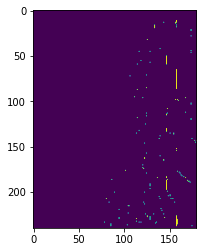

In [106]:
plt.imshow(events_buffer[100])